## Practice: Basic Artificial Neural Networks
Credits: this notebook belongs to [Practical DL](https://docs.google.com/forms/d/e/1FAIpQLScvrVtuwrHSlxWqHnLt1V-_7h2eON_mlRR6MUb3xEe5x9LuoA/viewform?usp=sf_link) course by Yandex School of Data Analysis.

We will start working with neural networks on the practice session. Your homework will be to finish the implementation of the layers.

Our goal is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design was heavily inspired by [PyTorch](http://pytorch.org) which is the main framework of our course

Speaking about the homework (once again, it will be really similar to this seminar), it requires sending **multiple** files, please do not forget to include all the files when sending to TA. The list of files:
- This notebook
- modules.ipynb with all blocks implemented (except maybe `Conv2d` and `MaxPool2d` layers implementation which are part of 'advanced' version of this homework)

In [ ]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Framework

Implement everything in `modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return **AND** store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`.

### Tech note
Prefer using `np.multiply`, `np.add`, `np.divide`, `np.subtract` instead of `*`,`+`,`/`,`-` for better memory handling.

Example: suppose you allocated a variable

```
a = np.zeros(...)
```
So, instead of
```
a = b + c  # will be reallocated, GC needed to free
```
You can use:
```
np.add(b,c,out = a) # puts result in `a`
```

In [ ]:
from google.colab import files
files.upload()

Saving modules.ipynb to modules.ipynb


{'modules.ipynb': b'{\n "cells": [\n  {\n   "cell_type": "markdown",\n   "metadata": {},\n   "source": [\n    "Credits: this notebook belongs to [Practical DL](https://docs.google.com/forms/d/e/1FAIpQLScvrVtuwrHSlxWqHnLt1V-_7h2eON_mlRR6MUb3xEe5x9LuoA/viewform?usp=sf_link) course by Yandex School of Data Analysis."\n   ]\n  },\n  {\n   "cell_type": "code",\n   "execution_count": 1,\n   "metadata": {},\n   "outputs": [],\n   "source": [\n    "import numpy as np"\n   ]\n  },\n  {\n   "cell_type": "markdown",\n   "metadata": {},\n   "source": [\n    "**Module** is an abstract class which defines fundamental methods necessary for a training a neural network. You do not need to change anything here, just read the comments."\n   ]\n  },\n  {\n   "cell_type": "code",\n   "execution_count": 2,\n   "metadata": {},\n   "outputs": [],\n   "source": [\n    "class Module(object):\\n",\n    "    \\"\\"\\"\\n",\n    "    Basically, you can think of a module as of a something (black box) \\n",\n    "  

In [ ]:
# (re-)load layers
%run modules.ipynb

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

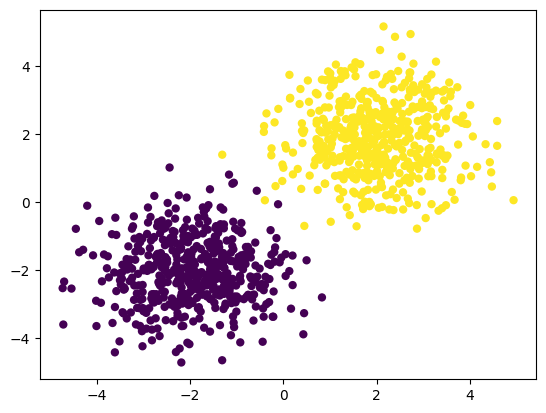

In [ ]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging.

In [ ]:
net = Sequential()
net.add(Linear(2, 2))
net.add(LogSoftMax())

criterion = ClassNLLCriterion()

print(net)

# Test something like that then

# net = Sequential()
# net.add(Linear(2, 4))
# net.add(ReLU())
# net.add(Linear(4, 2))
# net.add(LogSoftMax())

Linear 2 -> 2
LogSoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [ ]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

In [ ]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]

    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)

        batch_idx = indices[start:end]

        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

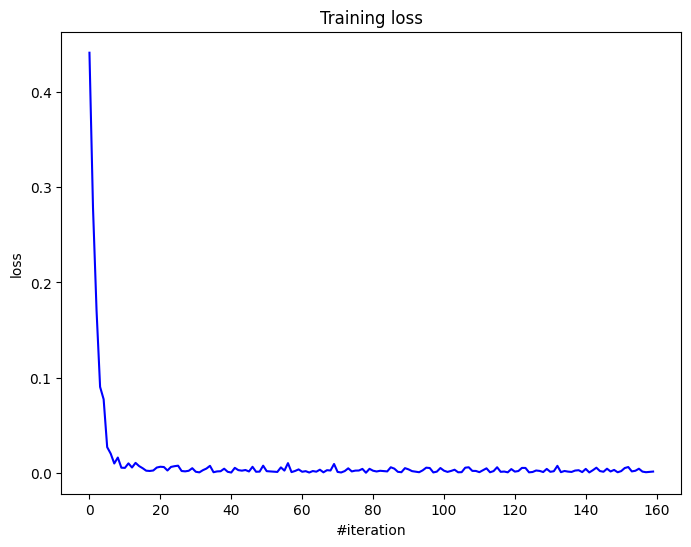

Current loss: 0.001342


In [ ]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):

        net.zeroGradParameters()

        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)

        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)

        # Update weights
        sgd_momentum(net.getParameters(),
                     net.getGradParameters(),
                     optimizer_config,
                     optimizer_state)

        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))

    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()

    print('Current loss: %f' % loss)

# Digit classification

We are using old good [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset. It can be downloaded with the following file.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_val, y_val = X_train[-10000:], y_train[-10000:]
X_train, y_train = X_train[:-10000], y_train[:-10000]

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")


Train shape: (50000, 28, 28), Validation shape: (10000, 28, 28), Test shape: (10000, 28, 28)


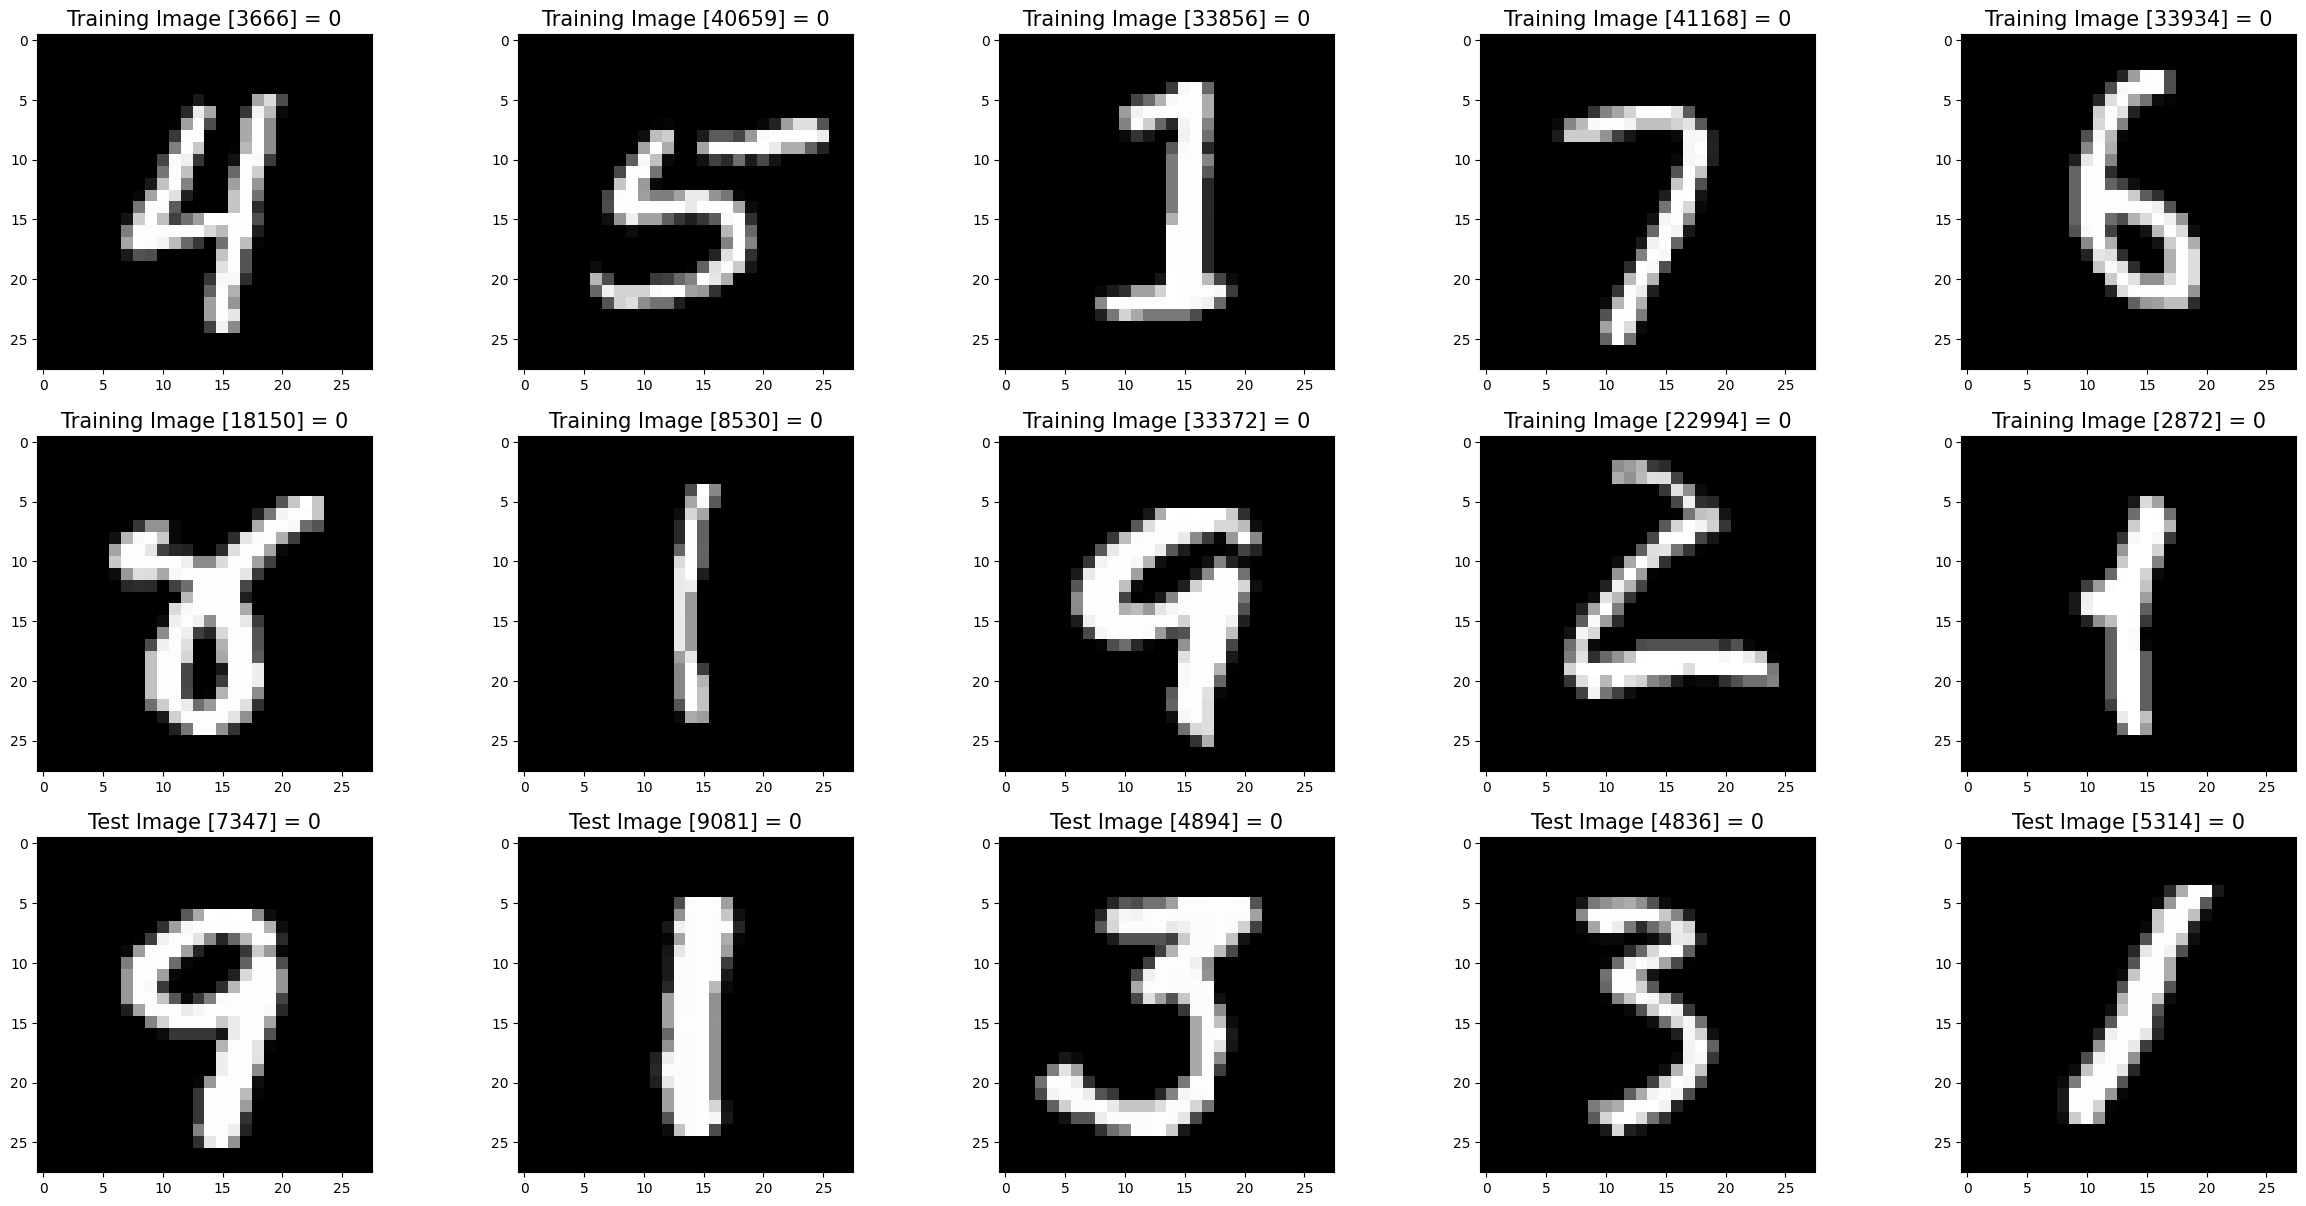

In [ ]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30, 20))
    index = 1
    for img, title in zip(images, title_texts):
        plt.subplot(rows, cols, index)
        plt.imshow(img, cmap=plt.cm.gray)
        if title:
            plt.title(title, fontsize=15)
        index += 1
    plt.show()
images_show = []
titles_show = []
for i in range(0, 10):
    r = random.randint(0, X_train.shape[0] - 1)
    images_show.append(X_train[r].squeeze())
    titles_show.append(f"Training Image [{r}] = {np.argmax(y_train[r])}")
for i in range(0, 5):
    r = random.randint(0, X_test.shape[0] - 1)
    images_show.append(X_test[r].squeeze())
    titles_show.append(f"Test Image [{r}] = {np.argmax(y_test[r])}")
show_images(images_show, titles_show)


One-hot encode the labels first.

In [ ]:
# Your code goes here. ################################################

def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((y.shape[0], num_classes))
    encoded[np.arange(y.shape[0]), y] = 1
    return encoded

y_train = one_hot_encode(y_train)
y_val = one_hot_encode(y_val)
y_test = one_hot_encode(y_test)

- **Compare** `ReLU`, `ELU`, `LeakyReLU`, `SoftPlus` activation functions.
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.
- **Try** inserting `BatchNormalization` (folowed by `ChannelwiseScaling`) between `Linear` module and activation functions.
- Plot the losses both from activation functions comparison and `BatchNormalization` comparison on one plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking.
- Plot the losses for two networks: one trained by momentum_sgd, another one trained by Adam. Which one performs better?
- Hint: good logloss for MNIST should be around 0.5.

--- Comparing Activation Functions ---
Training with ReLU...
Epoch [1/10], Loss: 0.2074
Epoch [2/10], Loss: 0.0851
Epoch [3/10], Loss: 0.0609
Epoch [4/10], Loss: 0.0452
Epoch [5/10], Loss: 0.0364
Epoch [6/10], Loss: 0.0300
Epoch [7/10], Loss: 0.0258
Epoch [8/10], Loss: 0.0242
Epoch [9/10], Loss: 0.0198
Epoch [10/10], Loss: 0.0198
Training with ELU...
Epoch [1/10], Loss: 0.2543
Epoch [2/10], Loss: 0.1270
Epoch [3/10], Loss: 0.0936
Epoch [4/10], Loss: 0.0731
Epoch [5/10], Loss: 0.0630
Epoch [6/10], Loss: 0.0527
Epoch [7/10], Loss: 0.0469
Epoch [8/10], Loss: 0.0399
Epoch [9/10], Loss: 0.0361
Epoch [10/10], Loss: 0.0296
Training with LeakyReLU...
Epoch [1/10], Loss: 0.2151
Epoch [2/10], Loss: 0.0919
Epoch [3/10], Loss: 0.0666
Epoch [4/10], Loss: 0.0524
Epoch [5/10], Loss: 0.0414
Epoch [6/10], Loss: 0.0364
Epoch [7/10], Loss: 0.0299
Epoch [8/10], Loss: 0.0262
Epoch [9/10], Loss: 0.0249
Epoch [10/10], Loss: 0.0228
Training with SoftPlus...
Epoch [1/10], Loss: 0.2937
Epoch [2/10], Loss: 0.135

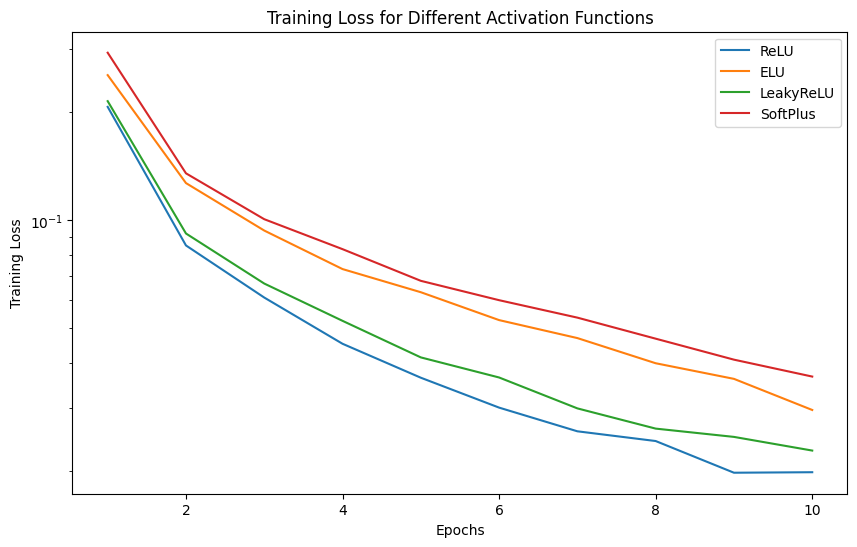

--- Comparing Optimizers ---
Training with Momentum SGD...
Epoch [1/10], Loss: 0.2136
Epoch [2/10], Loss: 0.0864
Epoch [3/10], Loss: 0.0581
Epoch [4/10], Loss: 0.0437
Epoch [5/10], Loss: 0.0336
Epoch [6/10], Loss: 0.0269
Epoch [7/10], Loss: 0.0207
Epoch [8/10], Loss: 0.0185
Epoch [9/10], Loss: 0.0146
Epoch [10/10], Loss: 0.0125
Training with Adam...
Epoch [1/10], Loss: 0.2077
Epoch [2/10], Loss: 0.0831
Epoch [3/10], Loss: 0.0585
Epoch [4/10], Loss: 0.0444
Epoch [5/10], Loss: 0.0386
Epoch [6/10], Loss: 0.0314
Epoch [7/10], Loss: 0.0266
Epoch [8/10], Loss: 0.0205
Epoch [9/10], Loss: 0.0199
Epoch [10/10], Loss: 0.0176


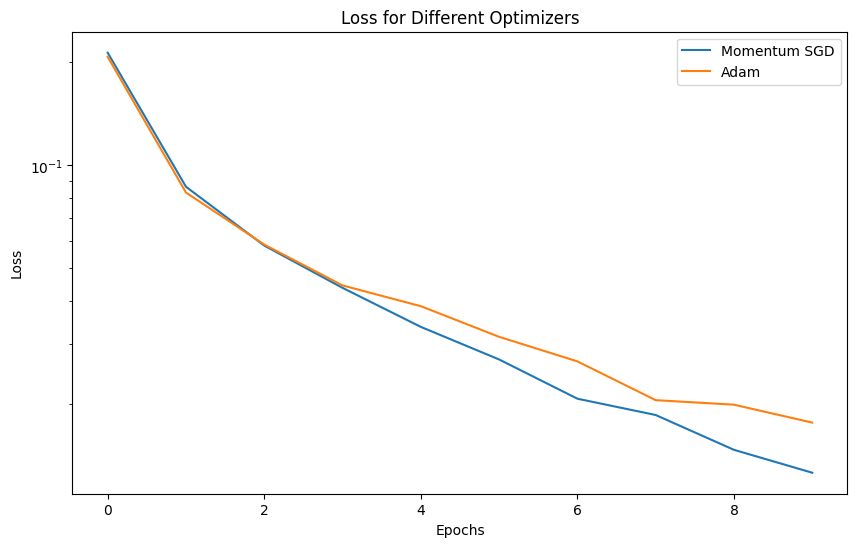

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

activations = {
    'ReLU': F.relu,
    'ELU': F.elu,
    'LeakyReLU': lambda x: F.leaky_relu(x, negative_slope=0.1),
    'SoftPlus': F.softplus
}

optimizers = {
    'Momentum SGD': lambda params: optim.SGD(params, lr=0.01, momentum=0.9),
    'Adam': lambda params: optim.Adam(params, lr=0.001)
}

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

class SimpleNet(nn.Module):
    def __init__(self, activation_fn):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.act1 = activation_fn
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.act2 = activation_fn
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.bn1(self.fc1(x))
        x = self.act1(x)
        x = self.bn2(self.fc2(x))
        x = self.act2(x)
        x = self.fc3(x)
        return x

criterion = nn.CrossEntropyLoss()

def train_model(model, optimizer, trainloader, criterion, epochs=5):
    model.train()
    losses = []
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(trainloader)
        losses.append(avg_loss)
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}')
    return losses

activation_results = {}
epochs = 10

print("--- Comparing Activation Functions ---")
for act_name, activation_fn in activations.items():
    print(f"Training with {act_name}...")
    model = SimpleNet(activation_fn)
    optimizer = optimizers['Adam'](model.parameters())
    history = train_model(model, optimizer, trainloader, criterion, epochs)
    activation_results[act_name] = history

plt.figure(figsize=(10, 6))
for act_name, loss in activation_results.items():
    plt.plot(range(1, epochs + 1), loss, label=act_name)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.yscale('log')
plt.title('Training Loss for Different Activation Functions')
plt.legend()
plt.show()

opt_results = {}

print("--- Comparing Optimizers ---")
for opt_name, opt_fn in optimizers.items():
    print(f"Training with {opt_name}...")
    model = SimpleNet(F.relu)  # Use ReLU activation for both optimizers
    optimizer = opt_fn(model.parameters())
    losses = train_model(model, optimizer, trainloader, criterion, epochs)
    opt_results[opt_name] = losses

plt.figure(figsize=(10, 6))
for opt_name, loss in opt_results.items():
    plt.plot(range(epochs), loss, label=opt_name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Loss for Different Optimizers')
plt.legend()
plt.show()


Write your personal opinion on the activation functions, think about computation times too. Does `BatchNormalization` help?

Оценка функций активации:
1. ReLU: Проста в использовании и быстра, но может привести к проблеме "мертвых нейронов", когда значения всегда равны нулю.
2. ELU: Более плавная функция по сравнению с ReLU, эффективно решает проблему "мертвых нейронов", но требует больше вычислительных ресурсов.
3. LeakyReLU: Устраняет проблему "мертвых нейронов", давая небольшой наклон в отрицательной области, при этом сохраняет высокую скорость работы.
4. SoftPlus: Модификация ReLU с более гладким переходом, однако вычислительно более сложная.


BatchNormalization улучшает стабильность и скорость обучения, что особенно важно для глубоких нейронных сетей. Нормализация каналов помогает снизить переобучение.

Сравнение оптимизаторов:
1. Adam: Обеспечивает быстрое достижение сходимости и минимальную настройку гиперпараметров.
2. Momentum SGD: Более традиционный оптимизатор, который показывает хорошие результаты на простых задачах, но требует внимательной настройки параметров.







**Finally**, use all your knowledge to build a super cool model on this dataset. Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. Don't forget to call `training()` and `evaluate()` methods to set desired behaviour of `BatchNormalization` and `Dropout` layers.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

!jupyter nbconvert --to script modules.ipynb
from modules import Flatten, Dropout, BatchNormalization, Module, Sequential, Linear, ReLU

def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((y.shape[0], num_classes))
    encoded[np.arange(y.shape[0]), y] = 1
    return encoded

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_val, y_val = X_train[-10000:], y_train[-10000:]
X_train, y_train = X_train[:-10000], y_train[:-10000:]

y_train = one_hot_encode(y_train)
y_val = one_hot_encode(y_val)
y_test = one_hot_encode(y_test)

model = Sequential()
model.add(Flatten())
model.add(Linear(784, 512))
model.add(ReLU())
model.add(Dropout(0.5))
model.add(Linear(512, 10))

import numpy as np

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def train(model, X_train, y_train, X_val, y_val, num_epochs=10, learning_rate=0.01, batch_size=32):
    num_train = X_train.shape[0]
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct_predictions = 0

        for i in range(0, num_train, batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            output = model.forward(X_batch)

            output = softmax(output)

            output = np.clip(output, 1e-8, 1 - 1e-8)

            loss = np.mean(np.sum(-y_batch * np.log(output), axis=1))
            total_loss += loss

            grad_output = output - y_batch
            model.backward(X_batch, grad_output)

            for param, grad_param in zip(model.getParameters(), model.getGradParameters()):
                if isinstance(param, np.ndarray) and isinstance(grad_param, np.ndarray):
                    param -= learning_rate * grad_param
                else:
                    for p, g in zip(param, grad_param):
                        p -= learning_rate * g

            model.zeroGradParameters()

            batch_accuracy = np.mean(np.argmax(output, axis=1) == np.argmax(y_batch, axis=1))
            correct_predictions += batch_accuracy * X_batch.shape[0]

        avg_loss = total_loss / (num_train // batch_size)
        avg_accuracy = correct_predictions / num_train

        val_output = model.forward(X_val)
        val_output = softmax(val_output)
        val_accuracy = np.mean(np.argmax(val_output, axis=1) == np.argmax(y_val, axis=1))

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}, Training Accuracy: {avg_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

train(model, X_train, y_train, X_val, y_val, num_epochs=10, learning_rate=0.01, batch_size=32)



2024-12-15 18:37:34.109516: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734277054.119106   12708 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734277054.121959   12708 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-15 18:37:34.132459: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[NbConvertApp] Converting notebook modules.ipynb to script
[NbConvertApp] Writing 36765 bytes to modules.py
Epoch 1/10, Loss: 0.3165, Training Accuracy: 0.9039, Validation Accuracy: 0.9461
Epoch 2/10, Loss: 0.1675, Training Accuracy: 0.9492, Validation Accuracy: 0.9489
Epoch 3/10, Loss: 0.1331, Training Accuracy: 0.9586, Validation Accuracy: 0.9616
Epoch 4/10, Loss: 0.1117, Training Accuracy: 0.9656, Validation Accuracy: 0.9598
Epoch 5/10, Loss: 0.1050, Training Accuracy: 0.9673, Validation Accuracy: 0.9645
Epoch 6/10, Loss: 0.0932, Training Accuracy: 0.9709, Validation Accuracy: 0.9633
Epoch 7/10, Loss: 0.0856, Training Accuracy: 0.9734, Validation Accuracy: 0.9669
Epoch 8/10, Loss: 0.0807, Training Accuracy: 0.9740, Validation Accuracy: 0.9684
Epoch 9/10, Loss: 0.0684, Training Accuracy: 0.9779, Validation Accuracy: 0.9639
Epoch 10/10, Loss: 0.0694, Training Accuracy: 0.9779, Validation Accuracy: 0.9700


Print here your accuracy on test set. It should be around 90%.

In [ ]:
def evaluate(model, X_test, y_test):
    output = model.forward(X_test)

    predictions = np.argmax(output, axis=1)
    true_labels = np.argmax(y_test, axis=1)

    accuracy = np.mean(predictions == true_labels)
    return accuracy

test_accuracy = evaluate(model, X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 96.72%


### Comparing with PyTorch implementation
The last (and maybe the easiest step after compared to the previous tasks: build a network with the same architecture as above now with PyTorch.

You can refer to the `week0_09` or `Lab3_part2` notebooks for hints.

__Good Luck!__

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = torch.tensor(X_train, dtype=torch.float32).view(-1, 28 * 28)
X_test = torch.tensor(X_test, dtype=torch.float32).view(-1, 28 * 28)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

X_val, y_val = X_train[-10000:], y_train[-10000:]
X_train, y_train = X_train[:-10000], y_train[:-10000]

train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

val_data = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = MLP()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
def train(model, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()

            output = model(X_batch)

            loss = criterion(output, y_batch)
            running_loss += loss.item()

            loss.backward()

            optimizer.step()

            _, predicted = torch.max(output, 1)
            correct_predictions += (predicted == y_batch).sum().item()
            total_samples += y_batch.size(0)

        avg_loss = running_loss / len(train_loader)
        avg_accuracy = correct_predictions / total_samples

        model.eval()
        val_correct_predictions = 0
        val_total_samples = 0

        with torch.no_grad():
            for X_val_batch, y_val_batch in val_loader:
                output = model(X_val_batch)
                _, predicted = torch.max(output, 1)
                val_correct_predictions += (predicted == y_val_batch).sum().item()
                val_total_samples += y_val_batch.size(0)

        val_accuracy = val_correct_predictions / val_total_samples

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}, Training Accuracy: {avg_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

train(model, train_loader, val_loader, num_epochs=10)

def evaluate(model, test_loader):
    model.eval()
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for X_test_batch, y_test_batch in test_loader:
            output = model(X_test_batch)
            _, predicted = torch.max(output, 1)
            correct_predictions += (predicted == y_test_batch).sum().item()
            total_samples += y_test_batch.size(0)

    test_accuracy = correct_predictions / total_samples
    return test_accuracy

test_accuracy = evaluate(model, test_loader)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10, Loss: 0.9822, Training Accuracy: 0.7575, Validation Accuracy: 0.8928
Epoch 2/10, Loss: 0.4556, Training Accuracy: 0.8729, Validation Accuracy: 0.9096
Epoch 3/10, Loss: 0.3794, Training Accuracy: 0.8930, Validation Accuracy: 0.9186
Epoch 4/10, Loss: 0.3358, Training Accuracy: 0.9036, Validation Accuracy: 0.9276
Epoch 5/10, Loss: 0.3056, Training Accuracy: 0.9131, Validation Accuracy: 0.9324
Epoch 6/10, Loss: 0.2814, Training Accuracy: 0.9200, Validation Accuracy: 0.9377
Epoch 7/10, Loss: 0.2611, Training Accuracy: 0.9260, Validation Accuracy: 0.9431
Epoch 8/10, Loss: 0.2444, Training Accuracy: 0.9305, Validation Accuracy: 0.9465
Epoch 9/10, Loss: 0.2293, Training Accuracy: 0.9337, Validation Accuracy: 0.9500
Epoch 10/10, Loss: 0.2152, Training Accuracy: 0.9400, Validation Accuracy: 0.9531
Test Accuracy: 95.07%
